In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from iqradre.prod.idcard import IDCardPredictor
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option("max_rows", None)
import imutils

In [17]:
%%time
config = {
    'detector': f'../weights/detect/craft_ktp_ohem.pth.tar',
    'recognitor': f'../weights/recog/ocrnet_pretrained_ktp.pth',
    'extractor': f'../weights/extract/layoutlm_v2.pth',
    'tokenizer': "indobenchmark/indobert-base-p2"   
}

idcard = IDCardPredictor(config, device='cpu')

INFO: Load all model, please wait...


Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMForTokenClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMForTokenClassification were not initialized from the model checkpoint at microsoft

INFO: All model has been loaded!
CPU times: user 7.44 s, sys: 1.34 s, total: 8.78 s
Wall time: 13.4 s


In [18]:
%%time
# impath = 'images/testktp/test_ktp1.jpg'
impath = '/data/idcard/combined/1606753021/100387_image.jpg'
pred_data = idcard.predict(impath)

CPU times: user 10.1 s, sys: 1.16 s, total: 11.3 s
Wall time: 1.67 s


In [19]:
pred_data.keys()

dict_keys(['prediction', 'dataframe', 'image', 'images_patch', 'boxes', 'texts', 'score_text', 'score_list', 'score'])

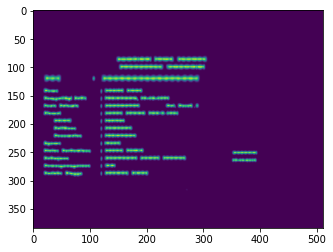

In [20]:
plt.imshow(pred_data['score']);plt.show()

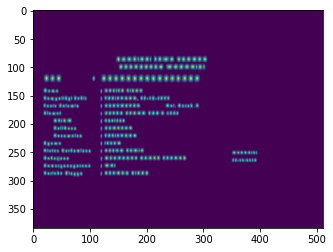

In [21]:
plt.imshow(pred_data['score_text']);plt.show()

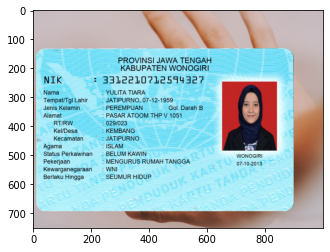

In [22]:
plt.imshow(pred_data['image']);plt.show()

In [23]:
pred_data['prediction']

{'provinsi': 'PROVINSI JAWA TENGAH',
 'kabupaten': 'KABUPATEN WONOGIRI',
 'nik': '3312210712594327',
 'nama': 'YULITA TIARA',
 'ttl': 'JATIPURNO, 07-12-1959',
 'gender': 'PEREMPUAN',
 'goldar': 'Ba',
 'alamat': 'PASAR ATOOM THPV 1051',
 'rtrw': '029/023',
 'kelurahan': 'KEMBANG',
 'kecamatan': 'JATIPURNO',
 'agama': 'ISLAM',
 'perkawinan': 'BELUM KAWIN',
 'pekerjaan': 'MENGURUSI RUMAH TANGGA',
 'kewarganegaraan': 'WNI',
 'berlaku': 'SEUMUR HIDUP',
 'sign_place': 'WONOGIRI',
 'sign_date': '07-10-2013'}

In [24]:
pred_data['dataframe']

,words,bboxes,tokens,labels,gseq,wseq
0,PROVINSI,"[290.0, 160.0, 422.0, 186.0]",provinsi,U-FLD_PROV,0,0
1,JAWA,"[424.0, 160.0, 502.0, 186.0]",jawa,B-VAL_PROV,1,0
2,TENGAH,"[504.0, 160.0, 618.0, 186.0]",tengah,L-VAL_PROV,2,0
3,WONOGIRI,"[466.0, 185.0, 612.0, 213.0]",wonogiri,U-VAL_KAB,3,0
4,KABUPATEN,"[300.0, 186.0, 464.0, 214.0]",kabupaten,U-FLD_KAB,4,0
5,NIK,"[34.0, 222.0, 102.0, 256.0]",nik,U-FLD_NIK,5,0
6,3312210712594327,"[236.0, 222.0, 592.0, 256.0]",33,B-VAL_NIK,6,0
7,3312210712594327,"[236.0, 222.0, 592.0, 256.0]",##122,I-VAL_NIK,6,1
8,3312210712594327,"[236.0, 222.0, 592.0, 256.0]",##107,I-VAL_NIK,6,2
9,3312210712594327,"[236.0, 222.0, 592.0, 256.0]",##125,I-VAL_NIK,6,3


In [25]:
pred_data['texts']

['PROVINSI',
 'JAWA',
 'TENGAH',
 'KABUPATEN',
 'WONOGIRI',
 'NIK',
 '3312210712594327',
 'L.',
 'Nama',
 'YULITA',
 'TIARA',
 'L',
 'Tempat/Tgl',
 'Lahira',
 'JATIPURNO,',
 '07-12-1959',
 'ar',
 'Jenis',
 'Kelamin',
 'PEREMPUAN',
 'Gol.',
 'Darah',
 'Ba',
 'a',
 'Alamat',
 'PASAR',
 'ATOOM',
 'THPV',
 '1051',
 'L:',
 'RT/RW',
 '029/023',
 'aw',
 'Kel/Desa',
 'KEMBANG',
 'a',
 'Kecamatan',
 'JATIPURNO',
 'E:',
 'Agama',
 'ISLAM',
 'SAN',
 'KAWIN',
 'Status',
 'Perkawinan',
 'BELUM',
 '2-',
 'WONOGIRI',
 'RUMAH',
 'Pekerjaan',
 'MENGURUSI',
 'TANGGA',
 'SW',
 '07-10-2013',
 'Kewarganegaraan',
 'WNI',
 'an',
 'Berlaku',
 'Hingga',
 'SEUMUR',
 'HIDUP',
 'aw']

In [26]:
impatch = pred_data['images_patch']
texts = pred_data['texts']

In [28]:
for idx, (patch, txt) in enumerate(zip(impatch, texts)):
    print(txt)    
    plt.imshow(patch);plt.show()
